In [135]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [136]:
data=pd.read_csv('creditcard.csv')

## Data Exploration

In [137]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre Processing Data

In [138]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount'],axis=1)

In [139]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [140]:
data= data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [141]:
x= data.iloc[:,data.columns!='Class']
y= data.iloc[:,data.columns=='Class']

In [142]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [143]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size=0.3,random_state=0)

In [145]:
x_train.shape

(199364, 29)

In [146]:
x_test.shape

(85443, 29)

In [147]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


## Deep Neural Network 

In [148]:
from keras.models import  Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [149]:
model= Sequential([
    Dense(units=16,input_dim=29,activation='relu'),    
    Dense(units=26,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 26)                442       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                540       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,991
Trainable params: 1,991
Non-trainable params: 0
_________________________________________________________________


## Training

In [151]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 40s 203us/step - loss: 0.0098 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 32s 160us/step - loss: 0.0037 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 33s 164us/step - loss: 0.0036 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 32s 161us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 32s 162us/step - loss: 0.0032 - acc: 0.9994


In [152]:
score=model.evaluate(x_test,y_test)

85443/85443 [==============================] - 4s 41us/step


In [153]:
print(score)

[0.0043191428926062335, 0.999403110845827]


In [154]:
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


In [155]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [156]:
y_pred=model.predict(x_test)
y_test=pd.DataFrame(y_test)


In [157]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())

In [158]:
print(cnf_matrix)

[[85276    20]
 [   31   116]]


Confusion matrix, without normalization
[[85276    20]
 [   31   116]]


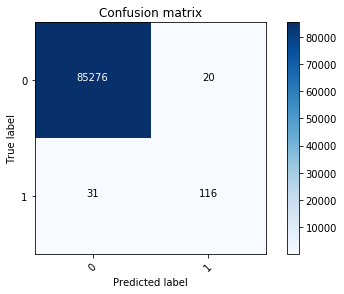

In [159]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

Confusion matrix, without normalization
[[284247     68]
 [   104    388]]


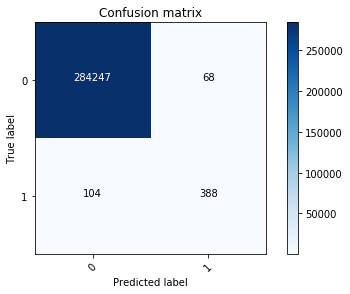

In [160]:
y_pred=model.predict(x)
y_expected=pd.DataFrame(y)
cnf_matrix1=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix1,classes=[0,1])
plt.show()


## Undersampling

In [161]:
fraud_indices=np.array(data[data.Class==1].index)
number_records_fraud=len(fraud_indices)
print(number_records_fraud) 

492


In [162]:
normal_indices=data[data.Class==0].index

In [163]:
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [164]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [165]:
under_sample_data=data.iloc[under_sample_indices,:]

In [166]:
x_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x_undersample,y_undersample,test_size=0.3)

In [168]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [169]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 26)                442       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                540       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,991
Trainable params: 1,991
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 2ms/step - loss: 0.4899 - acc: 0.9070
Epoch 2/5
688/688 [==============================] - 0s 192us/step - loss: 0.2126 - acc: 0.9273
Epoch 3/5
688/688 [==============================] - 0s 184us/step - loss: 0.1823 - acc: 0.9346
Epoch 4/5
688/688 [==============================] - 0s 178us/step - loss: 0.1522 - acc: 0.9419
Epoch 5/5
688/688 [==============================] - 0s 184us/step - loss: 0.1554 - acc: 0.9404


Confusion matrix, without normalization
[[150   0]
 [ 21 125]]


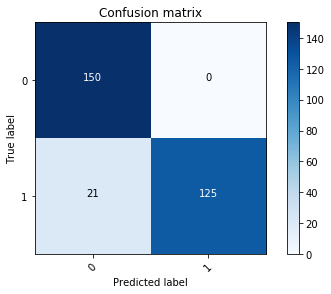

In [171]:
y_pred=model.predict(x_test)
y_expected=pd.DataFrame(y_test)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

Confusion matrix, without normalization
[[284049    266]
 [    61    431]]


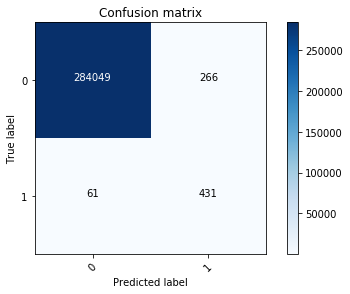

In [172]:
y_pred=model.predict(x)
y_expected=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## SMOTE

In [173]:
%%bash
pip install -U imbalanced-learn

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [174]:
from imblearn.over_sampling import SMOTE

In [175]:
x_resample,y_resample=SMOTE().fit_sample(x,y.values.ravel())

In [176]:
y_resample=pd.DataFrame(y_resample)
x_resample=pd.DataFrame(x_resample)

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3)

In [178]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 26)                442       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                540       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,991
Trainable params: 1,991
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 93s 234us/step - loss: 0.0319 - acc: 0.9891
Epoch 2/5
398041/398041 [==============================] - 87s 219us/step - loss: 0.0120 - acc: 0.9969
Epoch 3/5
398041/398041 [==============================] - 88s 221us/step - loss: 0.0094 - acc: 0.9977
Epoch 4/5
398041/398041 [==============================] - 89s 222us/step - loss: 0.0081 - acc: 0.9981
Epoch 5/5
398041/398041 [==============================] - 75s 187us/step - loss: 0.0077 - acc: 0.9982


Confusion matrix, without normalization
[[85061   253]
 [   17 85258]]


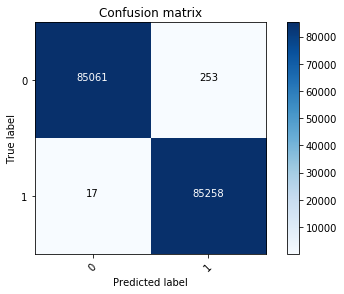

In [182]:
y_pred=model.predict(x_test)
y_expected=pd.DataFrame(y_test)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

Confusion matrix, without normalization
[[283518    797]
 [     2    490]]


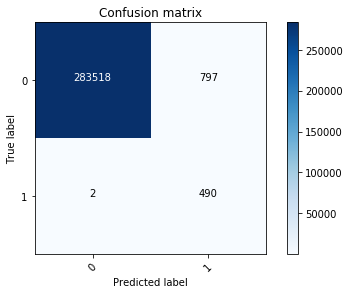

In [183]:
y_pred=model.predict(x)
y_expected=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])